# EDSA Movie Recommendation Challenge
**Team AM3**

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/1838/1*3m0Jmc_k0NP3_CCwnwdB7Q.png"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=1000px/>

</div>

# Connecting to Comet ☄️
Comet enables data scientists and teams to track, compare, explain and optimize experiments and models across the model's entire lifecycle. Below we initials our experiment.

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="hmdqMkcAoZUZ1yvEyo00sxXho",
    project_name="am3-unsupervised",
    workspace="courtney",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/courtney/am3-unsupervised/3d5993a074f241789e59d51861a5bc16



# Introduction 💁‍♂️

### Problem Statement

Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. Almost every major tech company has applied them in some form. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Here, we will be using creating a recommender system to recommend movies to watch. 

We will be using 2 types of recommendation systems in our project, namely: Content based filtering and Collaborative based filtering as seen below-

We can gather that Content-based filtering, makes recommendations based on user preferences for product features. Collaborative filtering mimics user-to-user recommendations. It predicts users preferences as a linear, weighted combination of other user preferences.

### Objectives
 - To construct a `recommendation` algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.
 - To compete in a `Kaggle` competition to find the best model for the job.
 - To share our findings witih an assessment board and via a `Streamlit app` to the world.
 - To achieve the lowest `RMSE` score possible

### Data Overview 

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

## Importing the libraries 🧰

Here, we import various packages and modules which enable us to perform many different tasks, such as manipulating the data, viewing the data, performing calculations of the data and visualizing the data.

In [63]:
# Install packages here
# Packages for data processing
import os
import pickle\

import warnings
from surprise import accuracy
from time import time
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
import heapq
from sklearn.feature_extraction.text import CountVectorizer
from surprise import CoClustering
from surprise import SlopeOne
from surprise import NMF
from surprise import SVDpp
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
from sklearn.decomposition import PCA


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify
%matplotlib inline

# Packages for modeling

# Packages for model evaluation

# Package to suppress warnings
warnings.filterwarnings("ignore")

# Packages for saving models
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Loading the datasets 📡

We must now load the data we will be using. The data we have received is in .csv (comma separated values) format, so to access the data through python, we use pandas (pd.read). We have 2 files which contain the train and test data respectively. The test data is a subset of train, and we use this method to ensure that the models we build are safe from data leakage and therefore, are of better quality.

In [3]:
df_sample_submission = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\sample_submission.csv")
df_movies = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\movies.csv")
df_imdb = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\imdb_data.csv",dtype = {'movieId': 'int32'})
df_genome_scores = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\genome_scores.csv", index_col='movieId')
df_genome_tags = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\genome_tags.csv")
df_train = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\train.csv")
df_test = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\test.csv")
df_tags = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\tags.csv")
df_links = pd.read_csv(r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\links.csv")

# EDA🔎
Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

### Understanding the dataset 

**Movies DataFrame**

Here we perform a basic analysis of the movies dataframe. We begin by generating the head of the dataframe below:

In [4]:
# Top 5 rows of dataframe
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
# Understanding the shape of the data
df_movies.shape

(62423, 3)

In [6]:
# Information about the dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
# Check if dataframe as any null values
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
# Top 20 genres by count:
df_genres = df_movies["genres"].value_counts()
df_genres.head(10)

Drama                   9056
Comedy                  5674
(no genres listed)      5062
Documentary             4731
Comedy|Drama            2386
Drama|Romance           2126
Horror                  1661
Comedy|Romance          1577
Comedy|Drama|Romance    1044
Drama|Thriller           933
Name: genres, dtype: int64

In [9]:
#Bottom 20 genres by volume:
df_genres = df_movies["genres"].value_counts()
df_genres.tail(20)

Action|Crime|Drama|Musical                          1
Action|Adventure|Animation|Comedy|Thriller          1
Crime|Drama|Fantasy|Horror|Thriller                 1
Action|Crime|Drama|Fantasy|Romance                  1
Action|Adventure|Animation|Drama|Sci-Fi             1
Drama|Fantasy|Horror|Mystery|Romance                1
Film-Noir|Thriller|War                              1
Comedy|Musical|Romance|War                          1
Children|Drama|Fantasy|Musical|Romance              1
Comedy|Fantasy|Horror|Sci-Fi|Thriller               1
Action|Adventure|Fantasy|Romance|IMAX               1
Crime|Drama|Thriller|Western                        1
Fantasy|Romance|Thriller|IMAX                       1
Adventure|Fantasy|Horror|Romance|Sci-Fi|Thriller    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX     1
Action|Adventure|Crime|Fantasy                      1
Drama|Film-Noir|Musical|Thriller                    1
Action|Drama|Horror|Mystery                         1
Adventure|Comedy|Sci-Fi|Thri

Surprisingly, the top genres by volume contain only one or two genre types, whereas the worst genres have several genre types. This is likely due to the fact that certain films are more esoteric and infrequent, resulting in a smaller dataset.

**The basic analysis of the Movies DataFrame is summarized here:**

There are 62423 rows and 3 columns in the movies dataframe (movieId, title and genres). There are duplicate titles in 98 of the rows. There are 1639 distinct genres listed, including blended genres. There are 5062 movies without a genre assigned to them, and the three most popular genres are drama, comedy, and documentary.

**IMDB Data**

We explore the IMBD data to learn more about the content of the movies and who worked on them.

In [10]:
# Display top 5 rows of dataframe
df_imdb.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [11]:
# Understanding the shape of the data
df_imdb.shape

(27278, 6)

Here we see that there are only 27277 movies in this dataframe, which is less than the 48213 movies in the ratings dataframe.

In [12]:
# Information about the dataframe
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int32  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 1.1+ MB


In [13]:
# Check if dataframe as any null values
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

**Basic examination of the IMDB DataFrame summarized:**

There are 27278 rows and 6 columns in the IMDB Dataframe (movieId, title cast, director, runtime, budget, and plot keywords). The only column that does not have any null entries is MovieId.

**Genome Scores DataFrame**

We'll look at the genomic scores data in this section. This dataset contains scores that indicate how relevant a tag is to a film.


In [14]:
# Display top 5 rows of dataframe
df_genome_scores.head()

tagId  relevance
movieId                  
1            1    0.02875
1            2    0.02375
1            3    0.06250
1            4    0.07575
1            5    0.14075

In [15]:
# Understanding the shape of the data
df_genome_scores.shape

(15584448, 2)

In [16]:
# Information about the dataframe
df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15584448 entries, 1 to 206499
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   tagId      int64  
 1   relevance  float64
dtypes: float64(1), int64(1)
memory usage: 356.7 MB


In [17]:
# Check if dataframe as any null values
df_genome_scores.isnull().sum()

tagId        0
relevance    0
dtype: int64

**Summary of the Genome Scores DataFrame**

The Genome Scores Dataframe has 15'584'448 rows and 3 columns (movieId, tagId and relevance).

**Genome Tags DataFrame**

Here we explore the tag data. These tags are assigned by a user.

In [18]:
# Display top 5 rows of dataframe
df_genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [19]:
# Understanding the shape of the data
df_genome_tags.shape

(1128, 2)

In [20]:
# Information about the dataframe
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [21]:
# Check if dataframe as any null values
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

**Summary Genome Tags DataFrame**
The Genome Tags Dataframe has 1'128 rows and 2 columns (tagId and tag). 

**Links DataFrame**

Here we explore the links dataframe. From Kaggle, this data serves as a link between a MovieLens ID and the IMDB and TMDB IDs associated with it.

In [22]:
# Display top 5 rows of dataframe
df_links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [23]:
# Understanding the shape of the data
df_links.shape

(62423, 3)

In [24]:
# Gather information about the dataframe
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [25]:
# Check if dataframe as any null values
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [26]:
# Drop all null values in links Dataframe
df_links.dropna(axis=0, inplace=True)

**Summary of the Links DataFrame**

The links dataframe has 62'423 rows and 3 columns (movieId, imdbId and tmdbId). 107 of the tmdbId's are null values.

**Tags Dataframe**

In [27]:
# Display top 5 rows of dataframe
df_tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [28]:
# Understanding the shape of the data
df_tags.shape

(1093360, 4)

In [29]:
# Gather information about the dataframe
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [30]:
# descriptive statistics summary
df_tags['tag'].describe()

count     1093344
unique      73050
top        sci-fi
freq         8330
Name: tag, dtype: object

In [31]:
# Check if dataframe as any null values
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [32]:
# Lets drop the rows with null values
df_tags = df_tags.dropna()

In [33]:
# This tells us count of each tag in descending order.
df_tags.tag.value_counts()

sci-fi              8330
atmospheric         6516
action              5907
comedy              5702
surreal             5326
                    ... 
teen sleuth            1
evil twins             1
paternity test         1
QVC                    1
cornetto triolgy       1
Name: tag, Length: 73050, dtype: int64

In [34]:
print('Dupplicate entries: {}'.format(df_tags.duplicated().sum()))

Dupplicate entries: 0


**Train Dataframe**

In [35]:
# Display top 5 rows of dataframe
df_train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [36]:
# Understanding the shape of the data
df_train.shape

(10000038, 4)

In [37]:
# Gather information about the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [38]:
# Check if dataframe as any null values
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

**Test Dataframe**

In [39]:
# Display top 5 rows of dataframe
df_test.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [40]:
# Understanding the shape of the data
df_test.shape

(5000019, 2)

In [41]:
# Gather information about the dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [42]:
# Check if dataframe as any null values
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

### Data Visualization
Data visualization is the presentation of data in a pictorial or graphical format. It enables decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns. With interactive visualization, you can take the concept a step further by using technology to drill down into charts and graphs for more detail, interactively changing what data you see and how it’s processed.

#### Visualizing Genre's
A film genre is a stylistic or thematic category for motion pictures based on similarities either in the narrative elements, aesthetic approach, or the emotional response to the film.
Below we will try and gain insight on the various genres found in our dataset.

In [43]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

movieId     genres
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

From the plot below, we can gather that the most common genres are Drama, comedy and thrillers. From this information, we can gather that viewers are most intrigued by the above-mentioned genres as these movies are produced the most.
We have also noticed that IMAX is the least favored genre, although this can be ambiguous as IMAX is more of an experience than a genre, as movies can have their own specific genre but still be seen normal cinemas as compared to an IMAX cinema. IMAX movies are made for huge theater screens with high quality special fx, therefore one might deduce that its count is low due to a higher budget for the above-mentioned features.

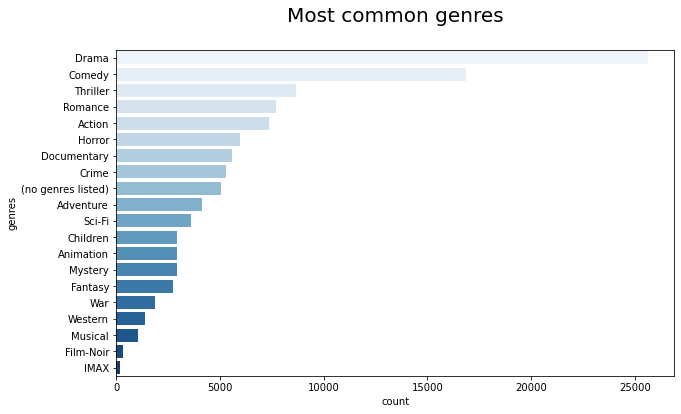

In [44]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(10, 6))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(
                  ascending=False).index,
              palette='Blues')
plt.show()

Let us now understand the amount of times a specific genre are have the most number of movies in our dataset.

#### Visualizing Rating's 

Ratings play an important role in our dataset, as, this describes how a user rates a movie on a scale of 1-5, with 5 being the best.

We will revisit ratings when building our models, later on in this notebook.

Below we will create the ratings dataframe by merging the movies and train dataframe's. 

In [45]:
# Creating the ratings dataframe
df = pd.merge(df_train, df_movies, on='movieId')
df.groupby('title')['rating'].mean().sort_values(ascending=False)
df.groupby('title')['rating'].count().sort_values(ascending=False)
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
df_rat = ratings.sort_values(by=['num_ratings'], ascending=False)

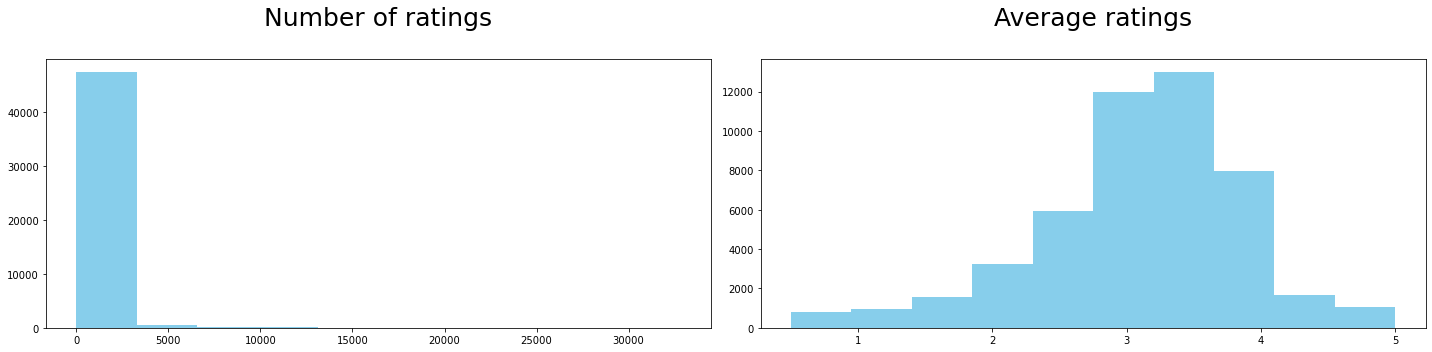

In [46]:
# Create a plot of the number of ratings
f, axarr = plt.subplots(1, 2, figsize=(20, 5))
axarr[0].hist(ratings['num_ratings'], bins=10, color="skyblue")
axarr[0].set_title('Number of ratings\n', fontsize=25)

# Create a plot showing the average ratings distribution
axarr[1].hist(ratings['rating'], bins=10, color="skyblue")
axarr[1].set_title('Average ratings\n', fontsize=25)

# Display both plots
plt.tight_layout()
plt.show()

Above, we can deduce that the most common rating is 3.5. Viewers are generally rating movies as average or as above-average.

Here we a distribution plot as well as a box and whisker plot. In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram

Text(0.5, 1.0, 'Distribution of Type Ratings')

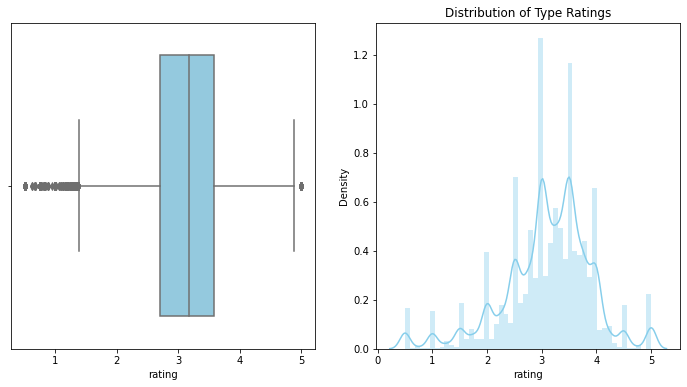

In [47]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ratings.rating, ax=ax[0], color="skyblue")
sns.distplot(ratings.rating, ax=ax[1], color="skyblue")
plt.title('Distribution of Type Ratings')

- From the histogram, we observe that most people have given ratings 3 and 4
- We also see that it follows a normal distribution, guasian curve

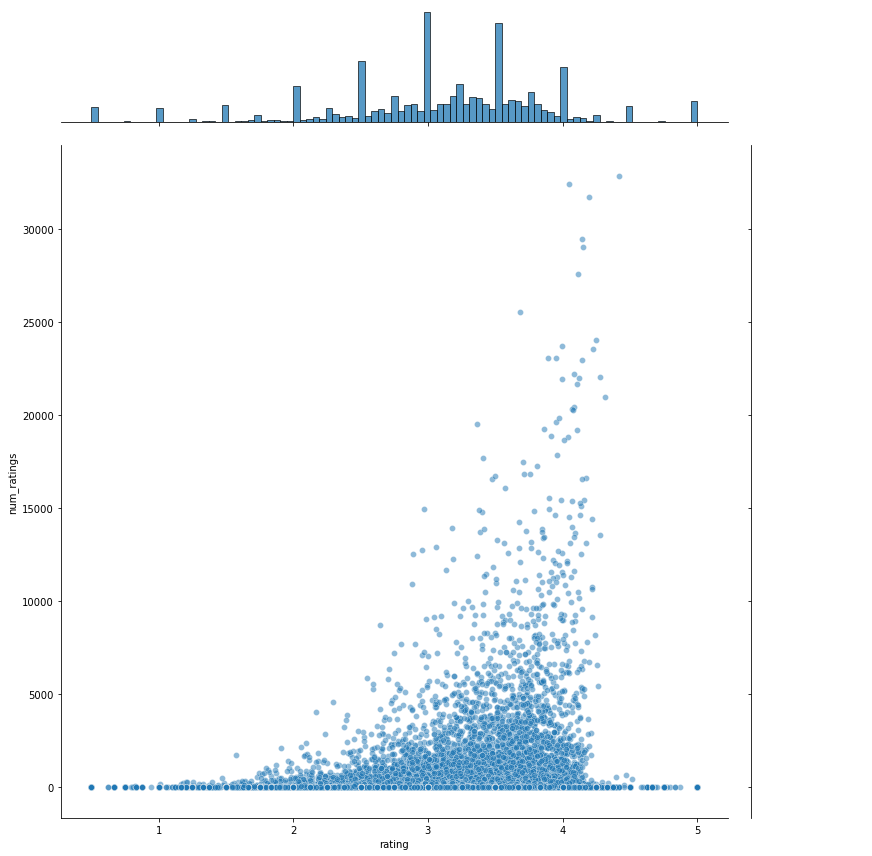

In [48]:
fig = sns.jointplot(x='rating', y='num_ratings',
                    data=ratings, alpha=0.5, height=12)

From the scatter plot above, we see that between ratings 3 & 4, the ratings are densely concentrated.

In [49]:
def top_n_plot_by_ratings(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(y = data.index, x = data, order= data.index, palette='Blues', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel(column.title())
    plt.ylabel('Number of Ratings')
    plt.show()

In [50]:
movies = pd.merge(df_train, df_movies, on='movieId', how='inner')
full_movies = pd.merge(movies, df_imdb, on='movieId', how='inner')

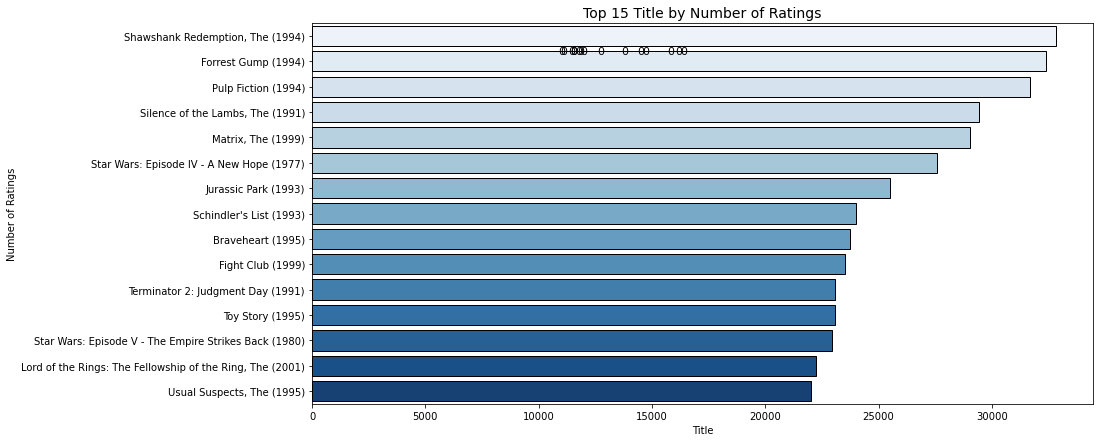

In [51]:
top_n_plot_by_ratings(movies, 'title', 15)

We see that Shawshank redemption is the highest rated movie in the dataset. One of the reasons could be due to its release date, which allowed more ratings over time and the fact that users like the movie.

#### Visualizing Movies metadata

Here we create a function that will enable us to visualize a scatterplot of the ratings dataframe. We will us it to visualize the highly rated and poorly rated movies with 500 or more ratings

In [52]:
df_movie = pd.read_csv(
    r"C:\Users\court\Desktop\AdvUnsupPre\edsa-movie-recommendation-challenge\movies.csv", index_col='movieId')


def plot_ratings(count, n, palette='Blues', best=True, method='mean'):

    # What are the best and worst movies
    # Creating a new DF with mean and count
    if method == 'mean':
        movie_avg_ratings = pd.DataFrame(df_train.join(
            df_movie, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_avg_ratings = pd.DataFrame(df_train.join(
            df_movie, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].median())
    movie_avg_ratings['count'] = df_train.groupby(
        'movieId')['userId'].count().values
    movie_avg_ratings.reset_index(inplace=True)
    movie_avg_ratings.set_index('movieId', inplace=True)

    # Remove movies that have been rated fewer than n times
    data = movie_avg_ratings[movie_avg_ratings['count'] > count]
    data.sort_values('rating', inplace=True, ascending=False)
    if best == True:
        plot = data.head(n).sort_values('rating', ascending=False)
        title = 'Best Rated'
        plt.figure(figsize=(10, 6))
    else:
        plot = data.tail(n).sort_values('rating', ascending=False)
        title = 'Worst Rated'
    plt.figure(figsize=(10, 6))
    sns.barplot(x=plot['rating'], y=plot['title'], palette='Blues')
    plt.xlabel('Rating')
    plt.ylabel('')
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.title(f'Top {n} {title} Movies with Over {count} Ratings', fontsize=14)

    plt.show()

<Figure size 720x432 with 0 Axes>

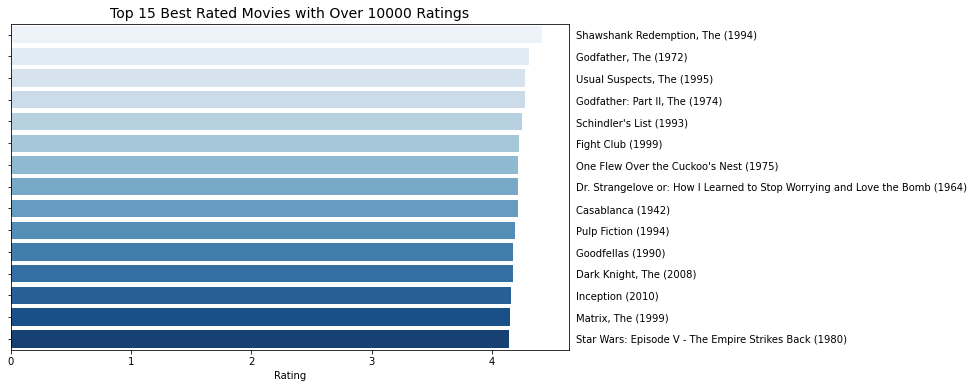

In [53]:
# What are the top 10 highest rated titles
plot_ratings(10000, 15, 'blue', True, 'mean')

From the plot above, we find that the most popular movies are predictable titles when we filter out movies with less than 10000 ratings. Unsurprisingly, The Shawshank Redemption and The Godfather are at the top of the list. It's worth noting that films released after 2000 are underrepresented. Are there any movies that users prefer to see that are older?

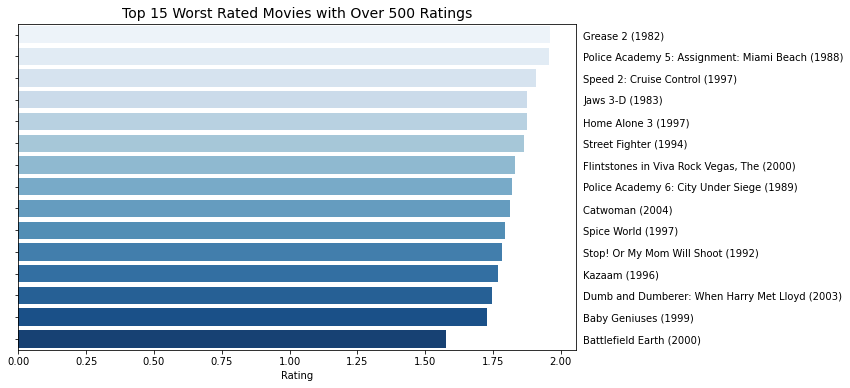

In [54]:
# What are the 10 worst rated titles?
plot_ratings(500, 15, 'blue', False, 'mean')

People did not like Battlefield too much and with 1200 ratings, they really wanted it to be known. It is interesting how many sequels appear in the list

Now we shall create a function to count the most common directors in the IMDB dataframe by filtering directors who have made 10 movies or more.

In [55]:
def count_directors(df, count=10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count'] >= count]
    return directors.sort_values('count', ascending=False)


directors = count_directors(df_imdb)

Here we create a function to plot our popular Movie Directors.

In [56]:
def feature_count(df, column):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(y=df[f'{column}'], x=df['count'],
                     palette='Blues', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

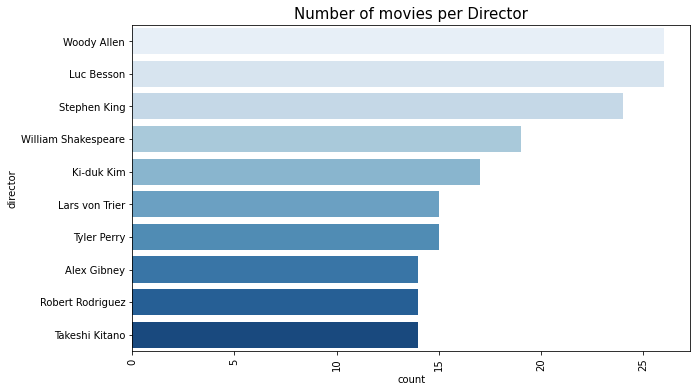

In [57]:
# Plotting top 10 movie directors using a count-plot
plt.figure(figsize=(10, 6))
director = df_imdb['director']  # .explode()
axes = sns.countplot(
    y=director, order=director.value_counts().index[1:11], palette='Blues')
axes.set_title('Number of movies per Director', fontsize=15)
plt.xticks(rotation=90)
plt.show()

From the barplot above we see that Woody Allen and Luc Besson are tied for first place for most popular movie directors.

And the same directors are at the top of the list for most number of movies.

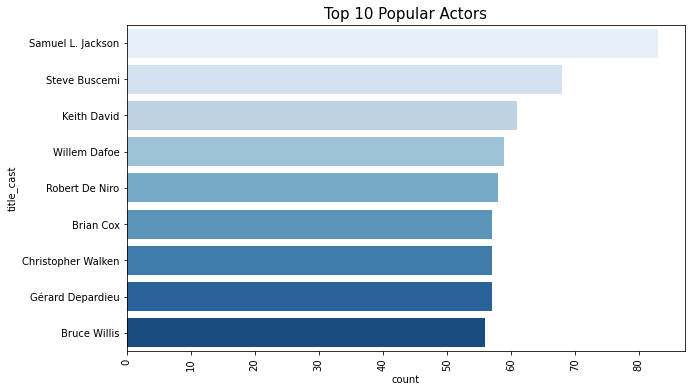

In [58]:
# Plotting popular cast using a count-plot
df_imdb['title_cast'] = df_imdb['title_cast'].str.split(
    '|')  # spliting the title cast into a list
plt.figure(figsize=(10, 6))
title_cast = df_imdb['title_cast'].explode()
ax = sns.countplot(
    y=title_cast, order=title_cast.value_counts().index[:9], palette='Blues')
ax.set_title('Top 10 Popular Actors', fontsize=15)
plt.xticks(rotation=90)
plt.show()

As we can see in the diagram above, Samuel L Jackson was the popular cast as he appeared in over 80 movies from our database. Steve Buscemi coming in 2nd with over 60 movies

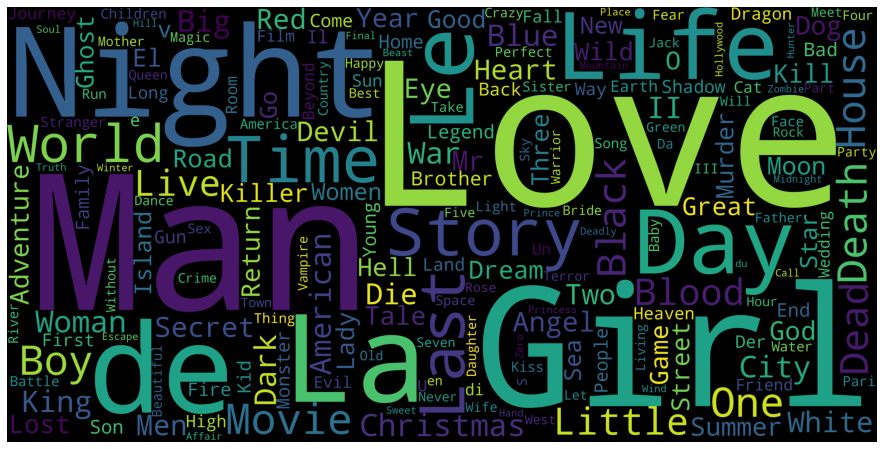

In [59]:
from wordcloud import WordCloud
# Creating a wordcloud of the movie titles to view the most popular movie titles withtin the word cloud
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',
                            height=2000, width=4000).generate(title_corpus)

# Plotting the wordcloud
plt.figure(figsize=(16, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

We have created a wordcloud, to highlight popular movie titles based on frequency and relevance. 
- The popular movie genre is Drama followed by Comedy.
- This corroborates with the most frequent movie titles above.
- 'Love', 'Girl', 'Man', 'Life', 'Story', 'Night' are words found in most drama titles

**Runtime Distribution**

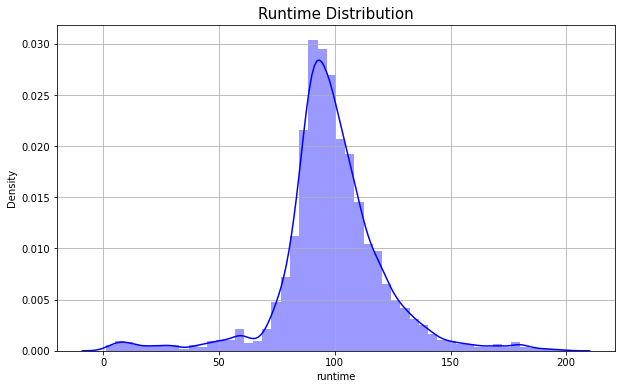

In [60]:
#Lets create a threshold
threshb = 200
thresh_dfb = df_imdb[df_imdb['runtime'] <= threshb]

#Plotting distribution of movies's duration using dist-plot
plt.figure(figsize = (10,6))
axes=sns.distplot(thresh_dfb['runtime'],color='blue', kde=True)
axes.set_title('Runtime Distribution',fontsize=15)
plt.grid()

We created a threshold for our visulaization because we have outliers in our dataset.
From the plot above we can note a few things:
- The plot follows a normal distribution , the probability distribution is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
- The range for runtime is from around 1min - 14,62hrs
- The average movie runtime is 1,67hrs 
- The longest movie is 14,62 hrs and is a TV show (series) called 'Taken' directed by Dakota Fanning and had a budget of $40,000,000.
- The shorted movies are is 1 min long are trailers

Here we merge the train and movie dataframes to gain insight on the ratings feature.

In [61]:
# Extract the release year from the movie titles
df_movies['release_year'] = df_movies.title.map(lambda x: re.findall('\d\d\d\d', x))
df_movies.release_year = df_movies.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(df_movies.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

In [64]:
#lets create a threshold, to show only years in which more than 5 movies were released.
thresh = 5
thresh_df = years[years['movies released'] >= thresh]

#lets create the line plot
fig = px.line(thresh_df, y='movies released', title= 'Movies released per year')
fig.show()

The movie release dates range from as early as 1003 to 2019. Before the 1900s there were less than 5 movies produced per year, therefore we have set our threshold to 5.
- There was a movie production boom in the early 2000, peaking around 2015 with 2515 movies produced.
- The recession in the USA might have contributed to the further decline in movie production around 2018.
- We expect the lowest numbers of movies produced to be in 2020 due to the pandemic, Covid19.

How many movies do we have?

We are curious to find out the proportion of movies in the dataframe versus the total number of rated movies total.

In [65]:
#the number of unique movies in the movies dataframe
num1 = len(df_movies.movieId.unique())
print('The number of unique movies in the dataframe is:', num1)

#the number of unique movies rated
num2 = len(df_train.movieId.unique())
print('The number of unique movies rated is:', num2)

The number of unique movies in the dataframe is: 62423
The number of unique movies rated is: 48213


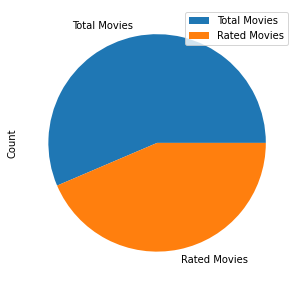

In [66]:
#Lets create a pie chart 
pi_data = [['Total Movies', 62423], ['Rated Movies', 48213]] 
df_pi = pd.DataFrame(pi_data, columns = ['Movies', 'Count']) 

df_pi.plot.pie(y='Count', figsize=(5,5),labels=df_pi['Movies'])
plt.show()

# Data Preprocessing 📊
Data preprocessing is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, and missing values, etc

### Content-based filtering
Content-based filtering recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. In the following section, the model uses genres as keywords to recommend similar movies based on input from a user. The model was not used to predict ratings for the testing data, as it is too computationally expensive.

<br></br>

<div align="center" style="width: 400px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/500/1*BME1JjIlBEAI9BV5pOO5Mg.png"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=300px/>

</div>

Below we create a function to process the data for the content based filtering algorithm. We include parameters such as the number of movies used within the dataset.

Thereafter the function performs filtering based on the list of movies supplied by the user and produces 10 recommendations based on the selection.

In [ ]:
def data_preprocessing(subset_size):

    # Split genre data into individual words.
    movies['keyWords'] = movies['genres'].str.replace('|', ' ')
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset


def content_model(movie_list, top_n=10):

    # Initializing the empty list of recommended movies
    data = data_preprocessing(2000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.Series(data['title'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    cosine_sim = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending=False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending=False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending=False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(
        score_series_3).sort_values(ascending=False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes, [idx_1, idx_2, idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(movies['title'])[i])
    return recommended_movies

Below we test out the funtion by using a single movie title from the datset.

In [ ]:
movies = df_movies.dropna()
movie_list = ['Grumpier Old Men (1995)', 'Ace Ventura: When Nature Calls (1995)',
              'Father of the Bride Part II (1995)']
content_model(movie_list, top_n=10)

As mentioned, the function provides 10 recommendations based on the selection.

### Collaborative Filtering
Collaborative filtering filters information by using the interactions and data collected by the system from other users. It's based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future.


Collaborative filtering can then be divided into 2 subsets, namely **Item** and **User** based collaborative filtering.



<br></br>

<div align="center" style="width: 400px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://miro.medium.com/max/500/1*x8gTiprhLs7zflmEn1UjAQ.png"
     alt="Barnicles on your ship :( "
     style="float: center; padding-bottom=0.5em"
     width=450px/>

</div>

- User-Based Collaborative Filtering:
This method aims at finding similar users and recommendations are made to a user based on what a similar user has liked.
- Item Based Collaborative Filtering: Here, new items are recommended to users based on their similarity with the items that the user has rated- highly in the past.

## Modelling phase 🧬


There are two types of methods that are commonly used in collaborative filtering:

Memory-based methods also referred to as neighborhood-based collaborative filtering algorithms, where ratings of user-item combinations are predicted based on their neighborhoods. These neighborhoods can be further defined as (1) User Based, and (2) Item Based.

In [ ]:
# Creating a small test dataframe to evaluate our models
trial_df = df_train.copy()
trial_df.drop(['timestamp'], axis=1, inplace=True)
trial_df.head()

In [ ]:
trial_df.shape

We select a portion of our data.
Using more of the data gives a memory error

In [ ]:
trial_df = trial_df.head(20000)

We will delete the timestamp column as we will not be using it. The Reader class is used to parse a file containing ratings. The ratings are from minimum of 0.5  to a maximum to 5.0.
- Cosine similarity is a metric used to measure how similar two items are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The output value ranges from 0–1. 0 means no similarity, where as 1 means that both the items are 100% similar.

**Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Therefore, we will be using it to test the accuracy of our predictions.

In [ ]:
# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(trial_df[['userId','movieId','rating']], reader)

**Model 1:** user-user collaborative filtering: 

In order to make a new recommendation to a user, user-user method roughly tries to identify users with the most similar “interactions profile” (nearest neighbours) in order to suggest items that are the most popular among these neighbours (and that are “new” to our user). This method is said to be “user-centred” as it represent users based on their interactions with items and evaluate distances between users.

In [ ]:
# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  

# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

**Model 2:** Item-item collaborative filtering:

To make a new recommendation to a user, the idea of item-item method is to find items similar to the ones the user already “positively” interacted with. Two items are considered to be similar if most of the users that have interacted with both of them did it in a similar way. This method is said to be “item-centred” as it represent items based on interactions users had with them and evaluate distances between those items

In [ ]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}  

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model 
cv = cross_validate(item_based, test_data, cv=5, measures=['RMSE'], verbose=True)

We used 0.2% of the train data and observed the following:
- The user based CF has an RMSE of 1.12
- The item based CF has an RMSE of 1.08 

In [ ]:
# creating the dataset
data = {'User based':1.12,
        'Item based':1.08,}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color =(0.2, 0.4, 0.6, 0.6),
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("RMSE score")
plt.title("RMSE score of selected models")
plt.show()

So we can conclude that the item based CF performs better. The lower the RMSE score, the better.

Collaborative filtering (CF) is a widely used technique to generate recommendations. The basic principle is that recommendations can be made according to the ratings of like-minded users. However, CF inherently suffers from two severe issues, which are the
problems;
- Data sparsity refers to the difficulty in finding sufficient reliable similar users since in general the active users only rated a small portion of items;
- Cold start refers to the difficulty in generating accurate recommendations for the cold users who only rated a small number of items

 **Singular value decomposition (SVD)**

The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

The factorisation of this matrix is done by the singular value decomposition. It finds factors of matrices from the factorisation of a high-level (user-item-rating) matrix. The essence of SVD is that it decomposes a matrix of any shape into a product of 3 matrices with nice mathematical properties: A=USVT.

We will use the Surprise library that uses extremely powerful algorithms like Singular Value Decomposition (SVD) to minimise RMSE and give great recommendations. 

Why use SVD over the covariance matrix?
- Its faster 
- Singular values from SVD are sorted (we have to sort the eigenvalues in ascending order)

In [ ]:
# Evaluate the model 
svd = SVD(random_state=0)
cv = cross_validate(svd, test_data, cv=5, measures=['RMSE'], verbose=True)

In [ ]:
# Lets train the model on the entire dataset 
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_train[['userId','movieId','rating']], reader)
trainingSet = data.build_full_trainset()
svd.fit(trainingSet)

In [ ]:
# Making predictions using the trained model
pred = [svd.predict(df_test.userId[i],df_test.movieId[i]).est for i in df_test.index]
df_test['rating'] = pred

# Submission 📩

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [ ]:
# Train the model on the entire dataset
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
trainingSet = data.build_full_trainset()
svd.fit(trainingSet)

In [ ]:
# Make predictions using the trained model
pred = [blo_test.predict(
    df_test.userId[i], df_test.movieId[i]).est for i in df_test.index]
df_test['rating'] = pred

In [ ]:
# Create the csv file for submission
df_test['Id'] = df_test['userId'].astype(
    str)+'_'+df_test['movieId'].astype(str)
df_test = df_test[['Id', 'rating']]
df_test.to_csv('sub20k.csv', index=False)

## Conclusion 👋

According to our EDA, a disproportionate number of reviews were submitted for movies released in 1995, implying that the models we've generated are trained on slightly outdated data and could presumably be improved by additional training on a dataset with reviews for more recent movies. Furthermore, we would like to repeat this process on larger datasets, which would allow us to omit incomplete rows.

We were able to perform both Content based filtering and Collaborative based filtering, although collaborative based filtering was the only algorithm which produced valid results with regard to modeling the dataset. The SVD model performed the best over-all and is the model used for the Kaggle submission.

Collaborative filtering methods suffer from the cold start problem, whereas content-based filtering methods do not. This issue can be solved by implementing a hybrid recommender system that employs both content and collaborative filtering methods.

In [ ]:
experiment.end()